# BRFSS Playground - EDA

Continuing on the BRFSS playground from a previous notebook.

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
brfss_cleaned = pd.read_csv('../data/brfss_cleaned.csv.gz')

In [3]:
brfss_cleaned.shape

(103388, 49)

In [4]:
target_var = 'MNTL_HLTH_LEV_BRFSS'

## Perform feature engineering

Make dummies

In [5]:
unordered_categorical_vars = [
    'EMPLOYMENT_BRFSS',
    'SEXUAL_ORIENT_BRFSS',
    'TRNSGNDR_BRFSS',
    'RCE_ETH_BRFSS'
]

In [6]:
brfss_w_dummies = pd.get_dummies(
    brfss_cleaned, 
    columns=unordered_categorical_vars,
    drop_first=True
)

Outlier reduction of continuous vars

In [20]:
high_value_continuous = [
    'AGE_BRFSS',
    'AVG_NUM_DRNK_30_BRFSS',
    'BINGE_DRNK_30_BRFSS',
    'DRNK_PER_DAY_BRFSS',
    'DLY_FF_SERVE_BRFSS',
    'DLY_FT_SERVE_BRFSS',
    'DLY_FJ_SERVE_BRFSS',
    'DLY_GRN_VEG_SERVE_BRFSS',
    'LARGE_NUM_DRNK_30_BRFSS',
    'MENTAL_HEALTH_30_BRFSS',
    'MET_VAL_BRFSS',
    'MET_VAL_OTHR_BRFSS',
    'TTL_MIN_OF_PA_WEEK_BRFSS',
    'TTL_MIN_OF_VIG_WEEK_BRFSS',
    'MIN_OF_PA_WEEK_BRFSS',
    'MIN_OF_PA_WEEK_OTHR_BRFSS',
    'MIN_OF_VIG_WEEK_BRFSS',
    'MIN_OF_VIG_WEEK_OTHR_BRFSS',
    'DLY_POTATO_SERVE_BRFSS',
    'DLY_OTHR_VEG_SERVE_BRFSS',
    'WEIGHT_BRFSS',
    'BMI_BRFSS',
    'NUM_DRNKS_PER_WEEK_BRFSS',
    'TOTAL_FT_DAY_BRFSS',
    'MIN_OF_EX_WEEK_BRFSS',
    'MIN_OF_EX_WEEK_OTHR_BRFSS',
    'TOTAL_VEG_DAY_BRFSS'
]

In [21]:
len(high_value_continuous)

27

In [10]:
ticks = [i / 100.0 for i in range(0, 105, 10)]

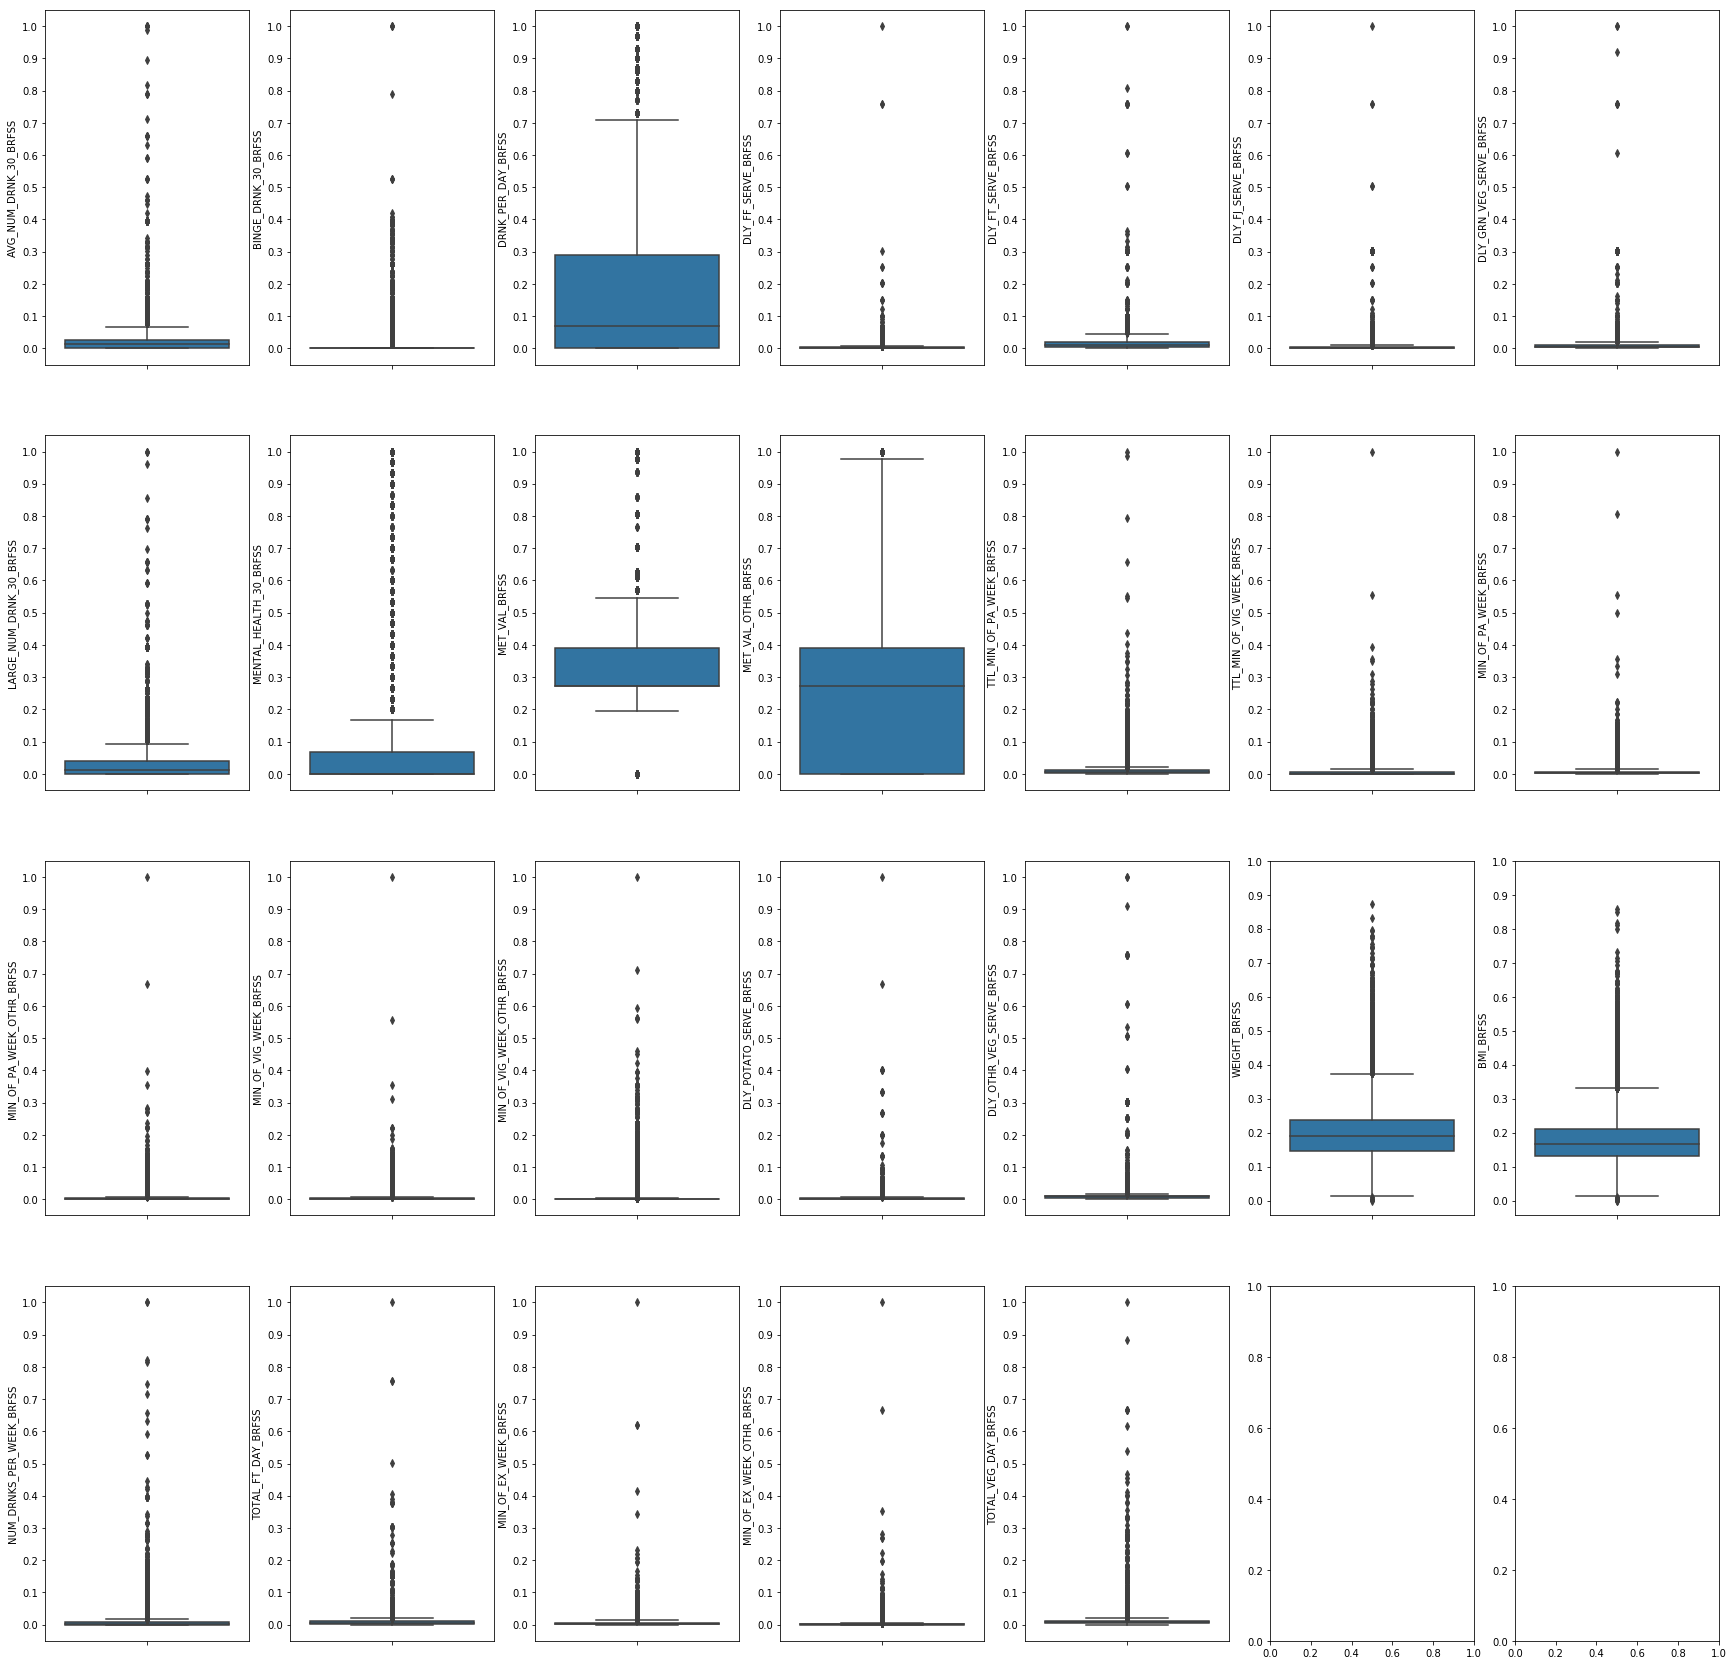

In [11]:
f, axs = plt.subplots(4, 7, figsize=(30, 30))
row = 0
col = 0
curr = 0
for i in high_value_continuous:
    temp = brfss_w_dummies[i].copy()
    temp = (temp  - temp.min()) / temp.max()
    temp = sns.boxplot(temp, orient='v', ax=axs[row, col])
    temp.set_yticks(ticks)
    curr += 1
    col += 1
    if curr % 7 == 0:
        row += 1
    if curr % 7 == 0:
        col = 0

In [12]:
cutoff_vals = {
    'AVG_NUM_DRNK_30_BRFSS': [0.0, 1.0],
    'BINGE_DRNK_30_BRFSS': [0.0, 0.5],
    'DRNK_PER_DAY_BRFSS': [0.0, 1.0],
    'DLY_FF_SERVE_BRFSS': [0.0, 0.6],
    'DLY_FT_SERVE_BRFSS': [0.0, 0.4],
    'DLY_FJ_SERVE_BRFSS': [0.0, 0.4],
    'DLY_GRN_VEG_SERVE_BRFSS': [0.0, 0.4],
    'LARGE_NUM_DRNK_30_BRFSS': [0.0, 1.0],
    'MENTAL_HEALTH_30_BRFSS': [0.0, 1.0],
    'MET_VAL_BRFSS': [0.2, 1.0],
    'MET_VAL_OTHR_BRFSS': [0.0, 1.0],
    'TTL_MIN_OF_PA_WEEK_BRFSS': [0.0, 0.9],
    'TTL_MIN_OF_VIG_WEEK_BRFSS': [0.0, 0.5],
    'MIN_OF_PA_WEEK_BRFSS': [0.0, 0.7],
    'MIN_OF_PA_WEEK_OTHR_BRFSS': [0.0, 0.6],
    'MIN_OF_VIG_WEEK_BRFSS': [0.0, 0.5],
    'MIN_OF_VIG_WEEK_OTHR_BRFSS': [0.0, 0.7],
    'DLY_POTATO_SERVE_BRFSS': [0.0, 0.5],
    'DLY_OTHR_VEG_SERVE_BRFSS': [0.0, 1.0],
    'WEIGHT_BRFSS': [0.0, 1.0],
    'BMI_BRFSS': [0.0, 1.0],
    'NUM_DRNKS_PER_WEEK_BRFSS': [0.0, 0.9],
    'TOTAL_FT_DAY_BRFSS': [0.0, 0.7],
    'MIN_OF_EX_WEEK_BRFSS': [0.0, 0.6],
    'MIN_OF_EX_WEEK_OTHR_BRFSS': [0.0, 0.6],
    'TOTAL_VEG_DAY_BRFSS': [0.0, 0.8]
}

In [13]:
brfss_filtered = brfss_w_dummies.copy()
for c in cutoff_vals:
    temp = brfss_w_dummies[c].copy()
    temp = (temp - temp.min()) / temp.max()
    keep_ind = temp.loc[
        (temp >= cutoff_vals[c][0]) & (temp <= cutoff_vals[c][1])
    ].index.values
    print(c)
    print(cutoff_vals[c][0])
    print(cutoff_vals[c][1])
    print(keep_ind.shape)
    print("\n")
    brfss_filtered = brfss_filtered.loc[
        brfss_filtered.index.isin(keep_ind), :
    ]

DLY_FJ_SERVE_BRFSS
0.0
0.4
(103383,)


BMI_BRFSS
0.0
1.0
(103388,)


DRNK_PER_DAY_BRFSS
0.0
1.0
(103388,)


MIN_OF_PA_WEEK_OTHR_BRFSS
0.0
0.6
(103386,)


DLY_FF_SERVE_BRFSS
0.0
0.6
(103385,)


MIN_OF_PA_WEEK_BRFSS
0.0
0.7
(103386,)


MIN_OF_EX_WEEK_BRFSS
0.0
0.6
(103385,)


MENTAL_HEALTH_30_BRFSS
0.0
1.0
(103388,)


DLY_OTHR_VEG_SERVE_BRFSS
0.0
1.0
(103388,)


MIN_OF_VIG_WEEK_OTHR_BRFSS
0.0
0.7
(103386,)


TTL_MIN_OF_VIG_WEEK_BRFSS
0.0
0.5
(103386,)


AVG_NUM_DRNK_30_BRFSS
0.0
1.0
(103388,)


TOTAL_VEG_DAY_BRFSS
0.0
0.8
(103386,)


TTL_MIN_OF_PA_WEEK_BRFSS
0.0
0.9
(103386,)


TOTAL_FT_DAY_BRFSS
0.0
0.7
(103385,)


DLY_GRN_VEG_SERVE_BRFSS
0.0
0.4
(103380,)


DLY_POTATO_SERVE_BRFSS
0.0
0.5
(103386,)


WEIGHT_BRFSS
0.0
1.0
(103388,)


LARGE_NUM_DRNK_30_BRFSS
0.0
1.0
(103388,)


BINGE_DRNK_30_BRFSS
0.0
0.5
(103381,)


MIN_OF_EX_WEEK_OTHR_BRFSS
0.0
0.6
(103386,)


MET_VAL_OTHR_BRFSS
0.0
1.0
(103388,)


MET_VAL_BRFSS
0.2
1.0
(97027,)


MIN_OF_VIG_WEEK_BRFSS
0.0
0.5
(103386,)


DLY_FT_SERVE_B

Look at variable variation per class

In [22]:
df_grouped = pd.DataFrame()
var_ordering = ['Variable', 'Values', 'MNTL_HLTH_LEV_BRFSS', 'Counts', 'Percentage']

brfss_vars = [
    i for i in brfss_filtered.columns.values 
    if i not in ['B_ID', 'SMP_WGHT', target_var]
]

# For each variable
for col in brfss_vars:
    temp = brfss_filtered[[col, target_var, 'B_ID']].copy()

    # If > 7 categories bin
    if len(temp[col].unique()) > 8:
        temp[col] = pd.cut(temp[col], bins=8, labels=range(8))

    # Look at variation when grouping by MNTL_HLTH_LEV_BRFSS
    temp_grouped = temp.groupby([col, target_var], as_index=False)['B_ID'].count()
    temp_grouped_total = temp_grouped.groupby([col], as_index=False)['B_ID'].sum()
    temp_grouped_total.rename(columns={'B_ID': 'Total'}, inplace=True)
    temp_grouped = pd.merge(
        left=temp_grouped, 
        right=temp_grouped_total, 
        on=col, 
        how='left'
    )
    temp_grouped['Percentage'] = temp_grouped['B_ID'] / temp_grouped['Total']
    temp_grouped['Variable'] = col
    temp_grouped.rename(columns={col: 'Values', 'B_ID': 'Counts'}, inplace=True)
    temp_grouped.drop(['Total'], axis=1, inplace=True)
    temp_grouped.fillna(0.0, inplace=True)
    
    df_grouped = pd.concat([df_grouped, temp_grouped[var_ordering]])

    # If > x% is the same category, and not spread within one class..toss


In [15]:
df_grouped.to_csv('../data/brfss_variables_mntl_hlth_cat.csv', index=False)

In [16]:
plot_vars = [i for i in brfss_vars if i not in high_value_continuous]

Small-value continuous

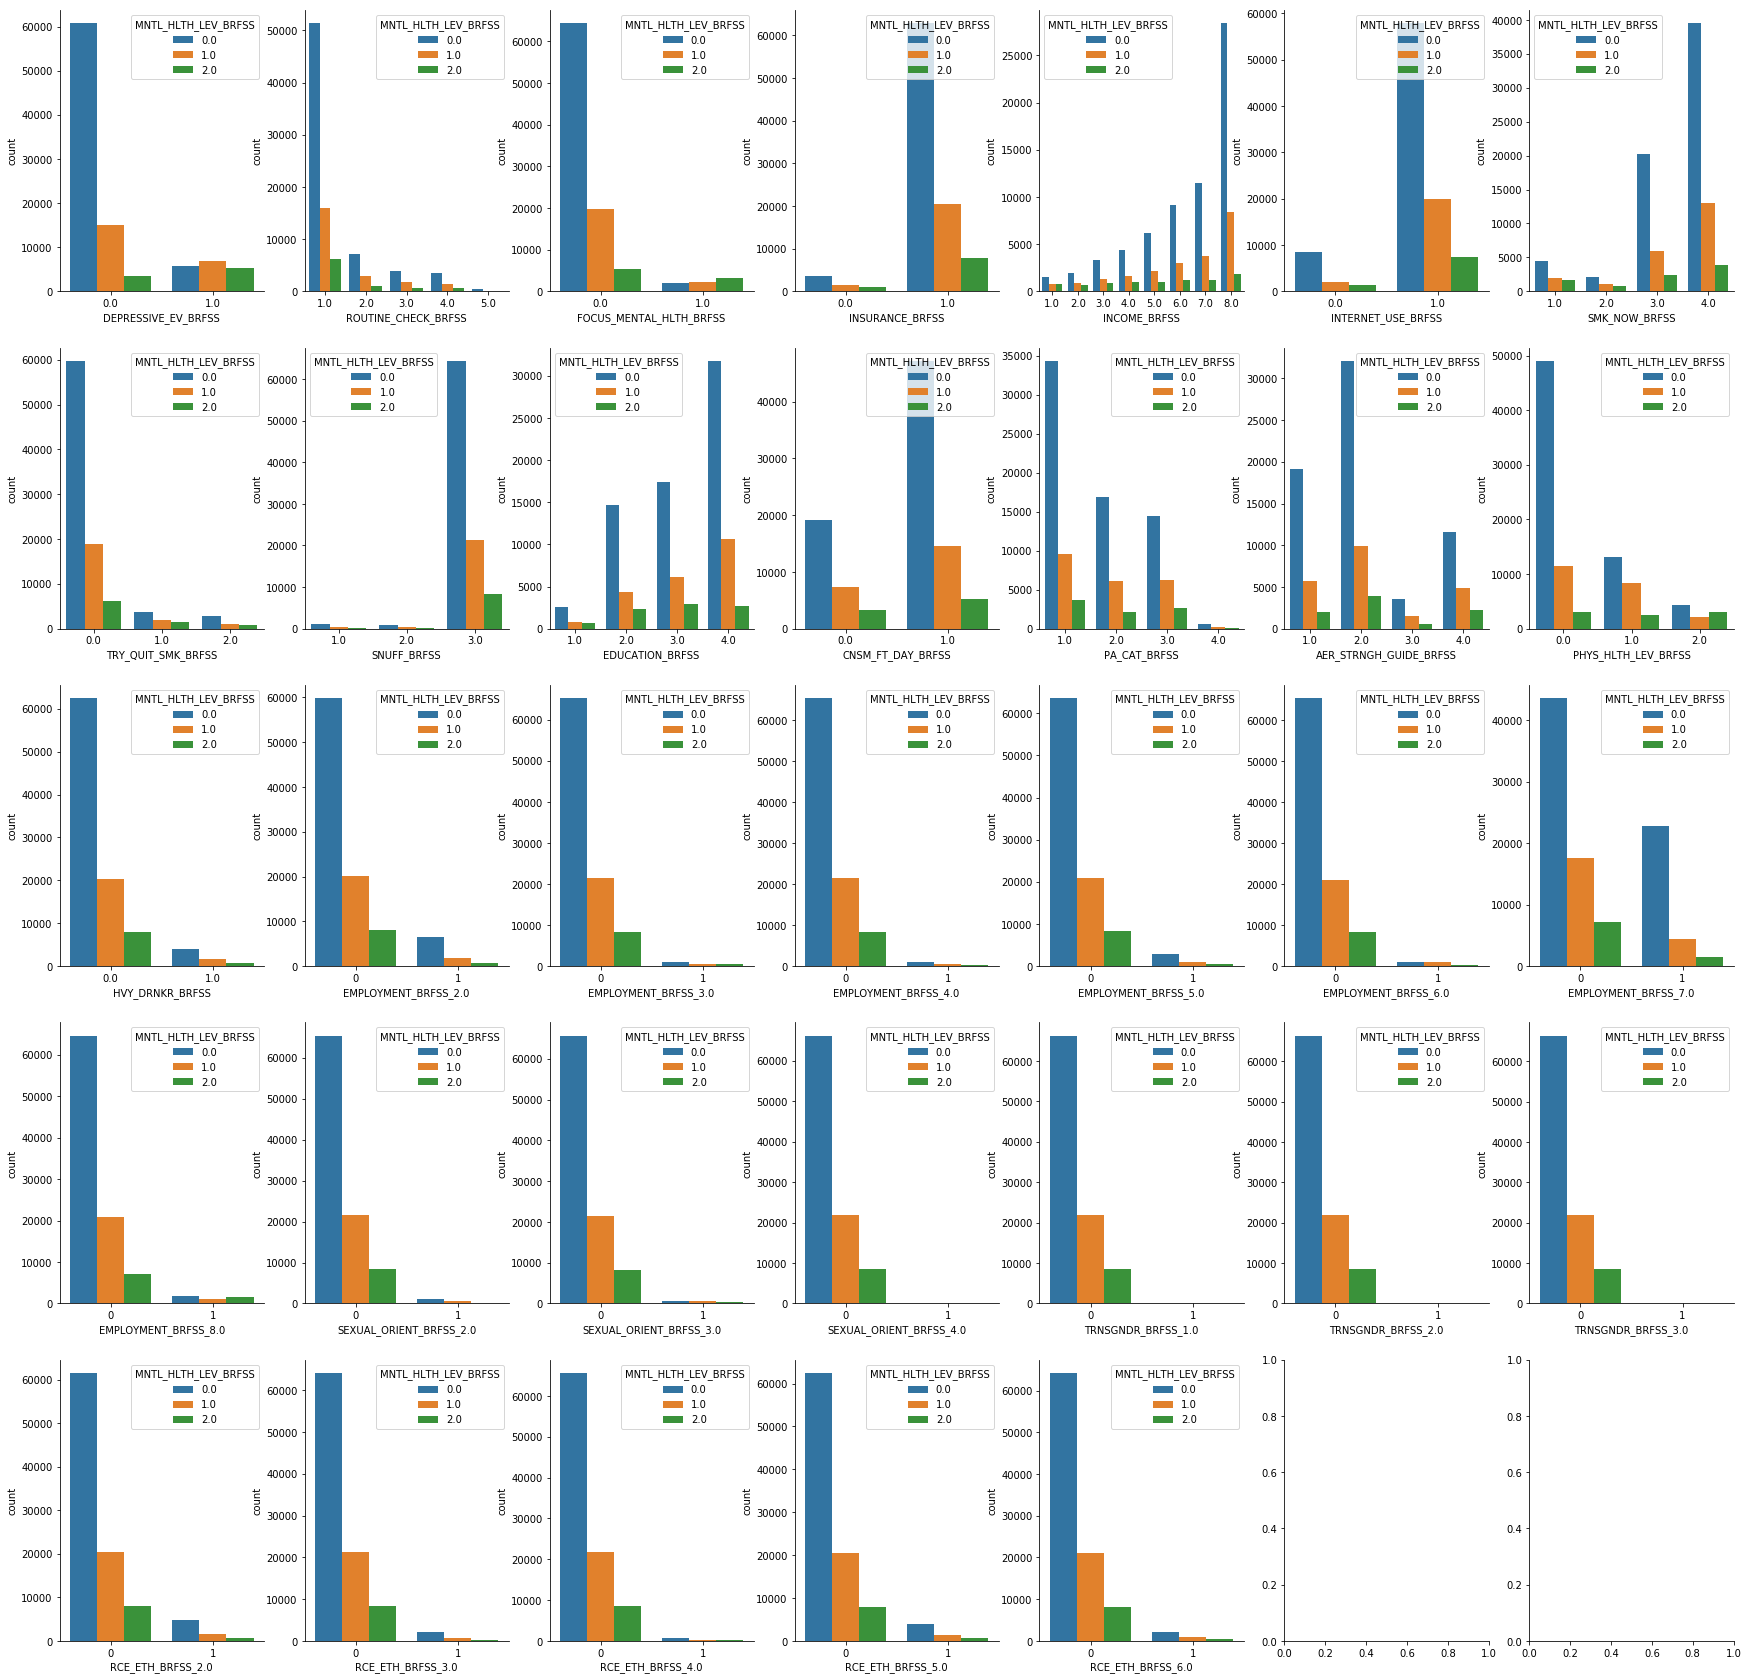

In [28]:
low_value_continuous = [i for i in brfss_vars if i not in high_value_continuous]
f, axs = plt.subplots(5, 7, figsize=(30, 30))
row = 0
col = 0
curr = 0

for c in low_value_continuous:
    sns.countplot(x=c, hue="MNTL_HLTH_LEV_BRFSS", data=brfss_filtered, ax=axs[row, col])
    sns.despine()
    curr += 1
    col += 1
    if curr % 7 == 0:
        row += 1
    if curr % 7 == 0:
        col = 0

High value continuous

/Users/daadler0309/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


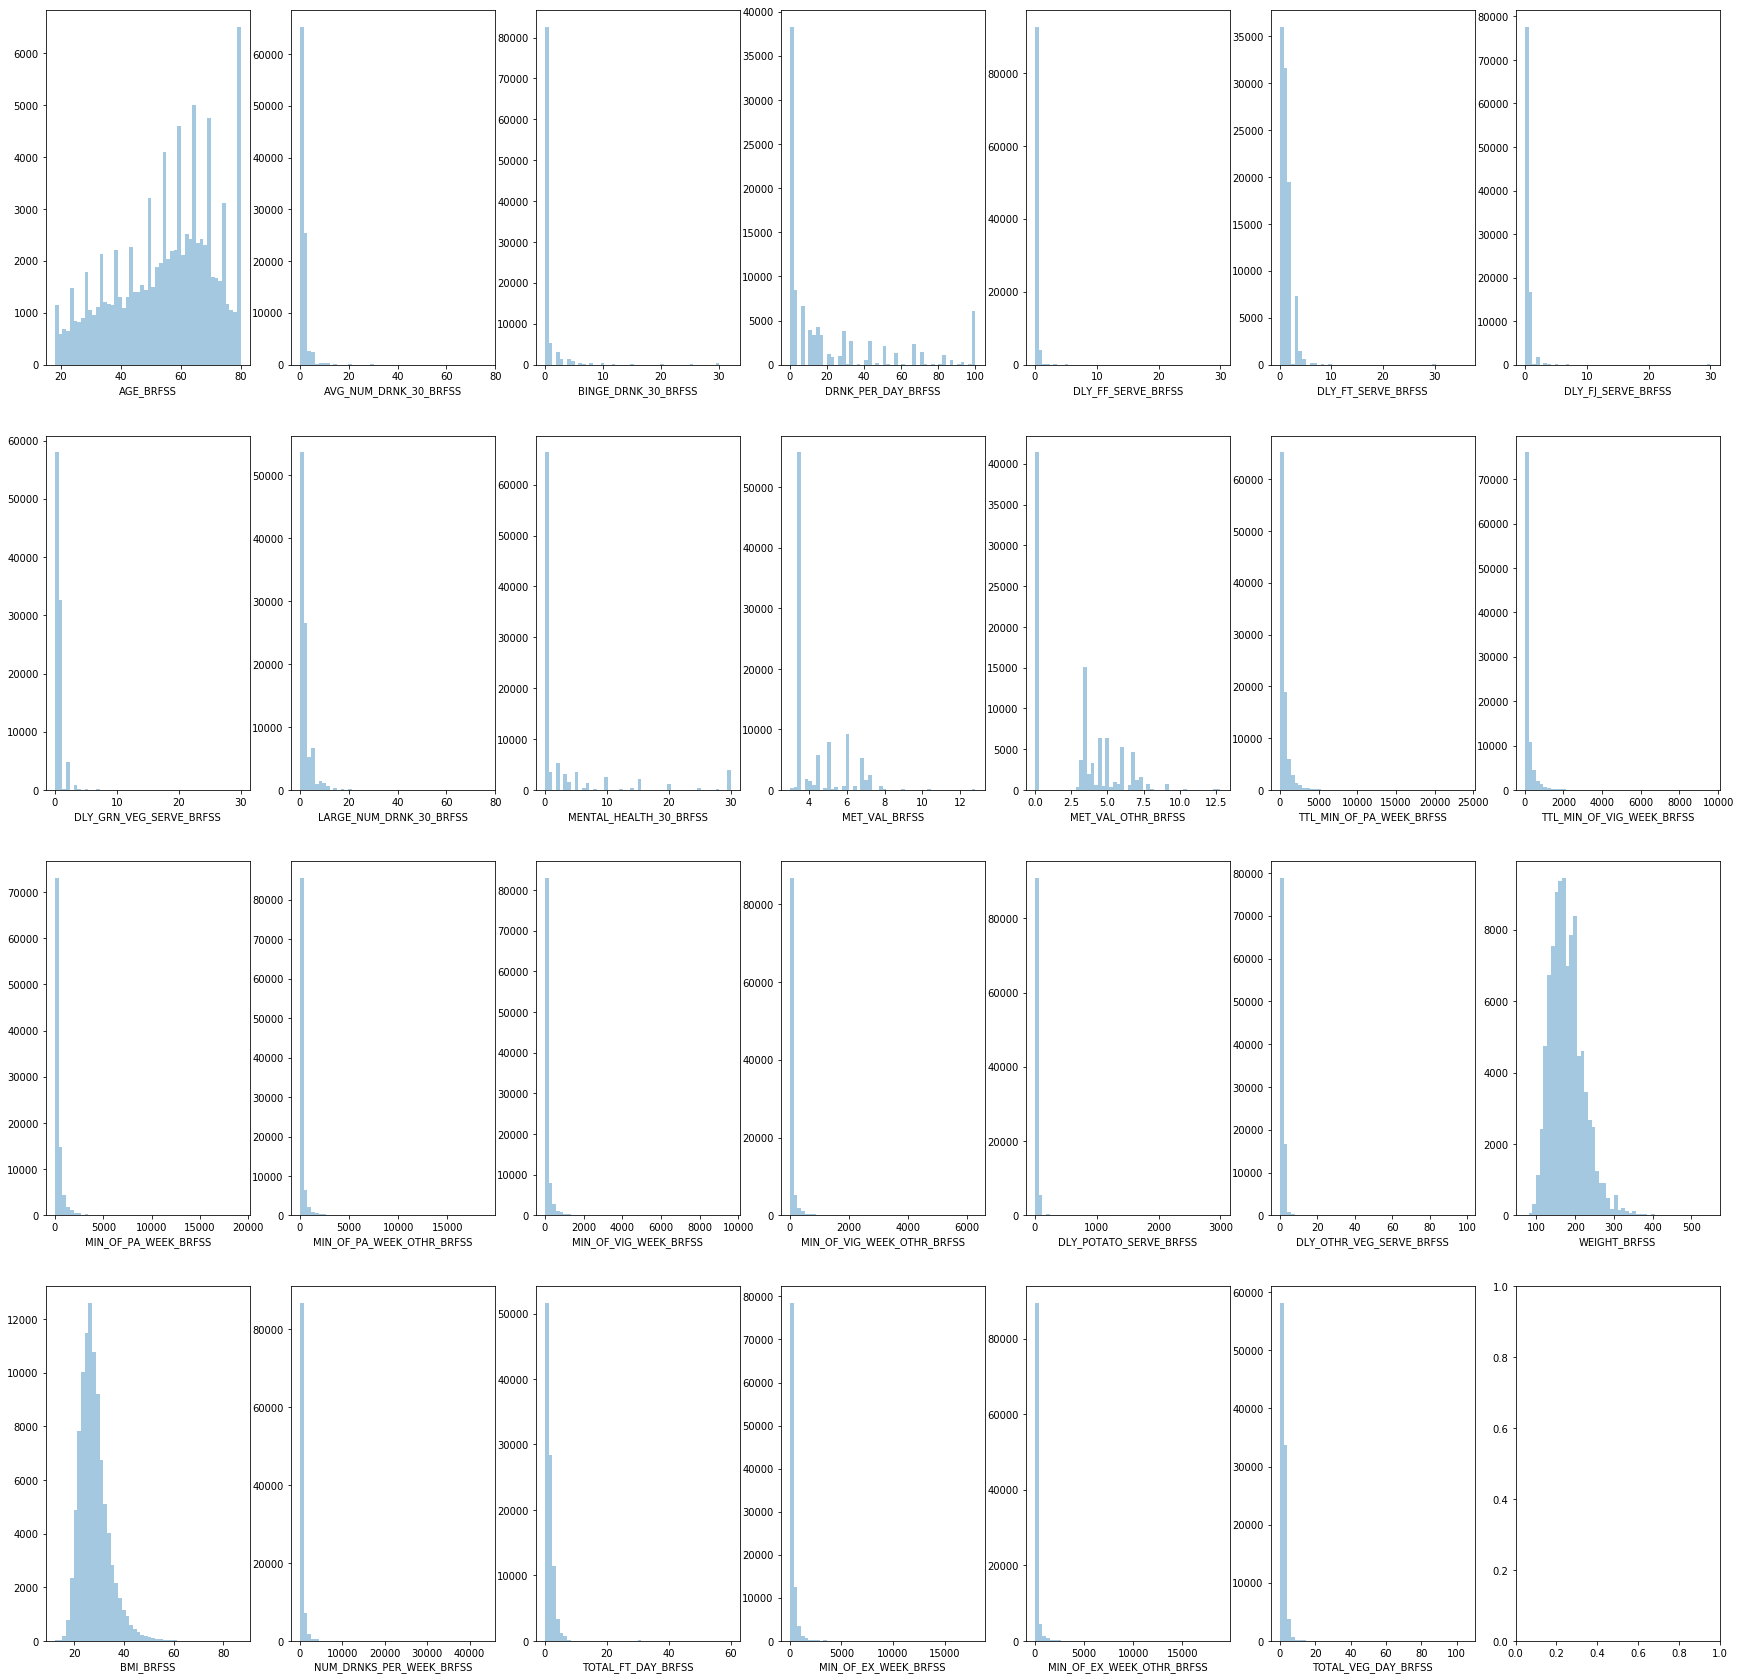

In [24]:
f, axs = plt.subplots(4, 7, figsize=(30, 30))
row = 0
col = 0
curr = 0
for i in high_value_continuous:
    temp = sns.distplot(
        brfss_filtered[i], 
        kde=False,
        rug=False,
        norm_hist=False,
        ax=axs[row, col],
    )
    curr += 1
    col += 1
    if curr % 7 == 0:
        row += 1
    if curr % 7 == 0:
        col = 0

Now scale...

In [35]:
# Normalize to -1/1 all bounded continuous input (or binary input should follow the same)
min_max_scaler = MinMaxScaler(feature_range=[-1, 1])
low_val_cont_df = min_max_scaler.fit_transform(brfss_filtered[low_value_continuous])
low_val_cont_df = pd.DataFrame(data=low_val_cont_df, columns=low_value_continuous)

In [49]:
print('Min = ' + str(low_val_cont_df.min().round(5).unique()))
print('Max = ' + str(low_val_cont_df.max().round(5).unique()))

Min = [-1.]
Max = [1.]


In [44]:
# Standardize by a standardization technique for other distributions
std_scaler_df = StandardScaler()
high_val_cont_df = std_scaler_df.fit_transform(brfss_filtered[high_value_continuous])
high_val_cont_df = pd.DataFrame(data=high_val_cont_df, columns=high_value_continuous)

In [48]:
print('Mean = ' + str(high_val_cont_df.mean().round(5).unique()))
print('Std = ' + str(high_val_cont_df.std().round(5).unique()))

Mean = [-0.]
Std = [1.00001]


In [54]:
low_val_cont_df.index = brfss_filtered.index
high_val_cont_df.index = brfss_filtered.index

brfss_norm = pd.concat([
    brfss_filtered[['B_ID', 'SMP_WGHT', target_var]],
    low_val_cont_df,
    high_val_cont_df
], axis=1)

In [55]:
brfss_norm.shape

(96986, 63)

Replot scaled values

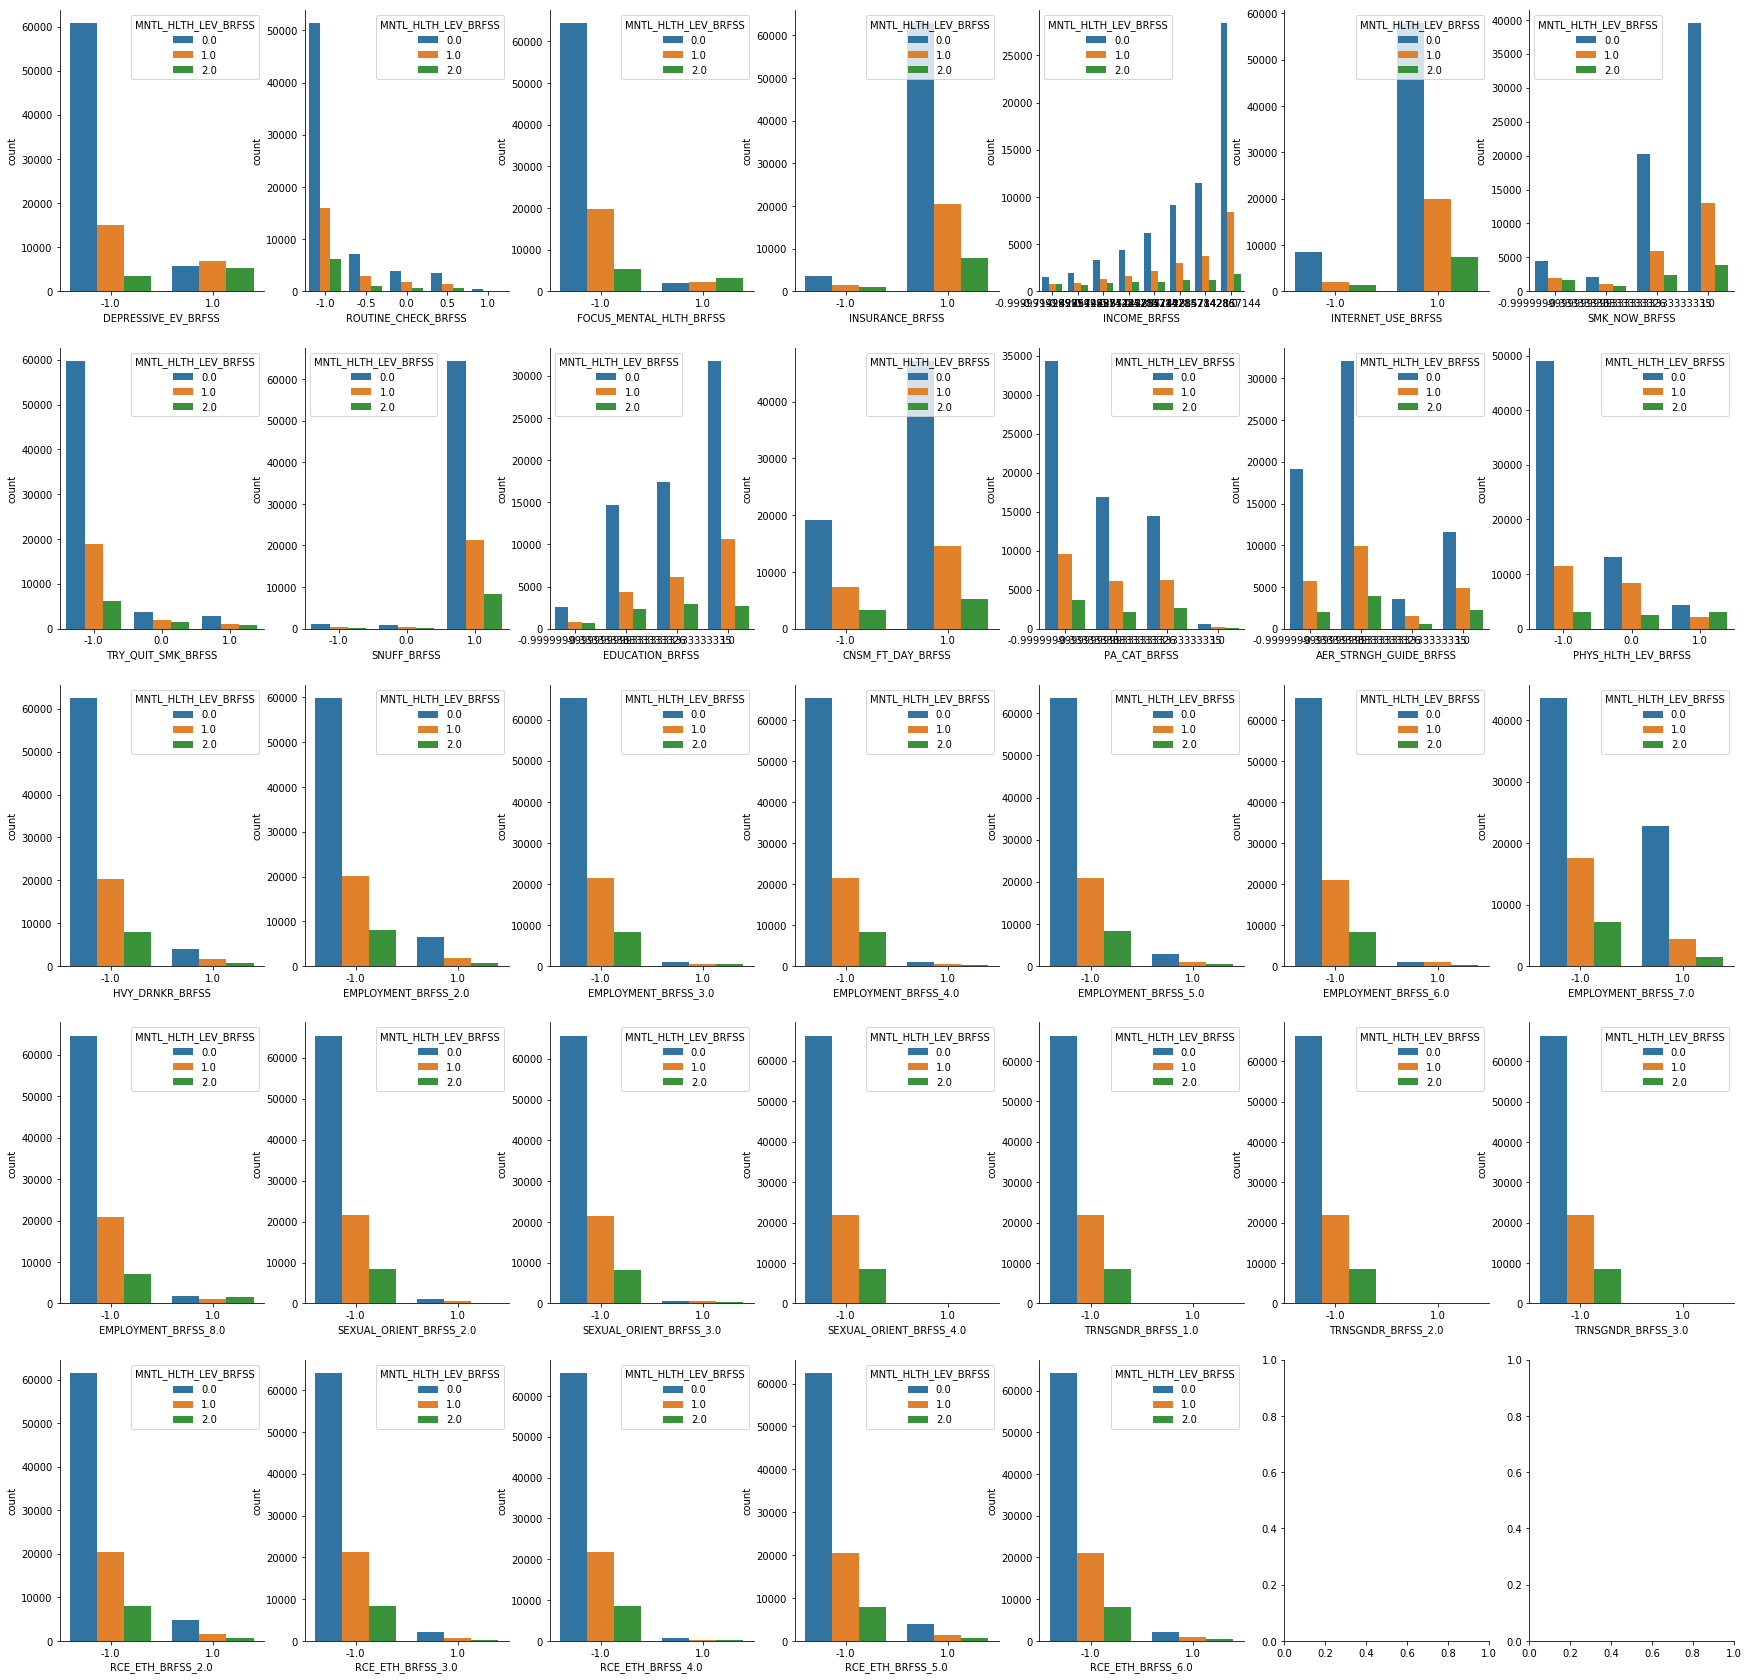

In [60]:
f, axs = plt.subplots(5, 7, figsize=(30, 30))
row = 0
col = 0
curr = 0

for c in low_value_continuous:
    sns.countplot(x=c, hue="MNTL_HLTH_LEV_BRFSS", data=brfss_norm, ax=axs[row, col])
    sns.despine()
    curr += 1
    col += 1
    if curr % 7 == 0:
        row += 1
    if curr % 7 == 0:
        col = 0

/Users/daadler0309/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


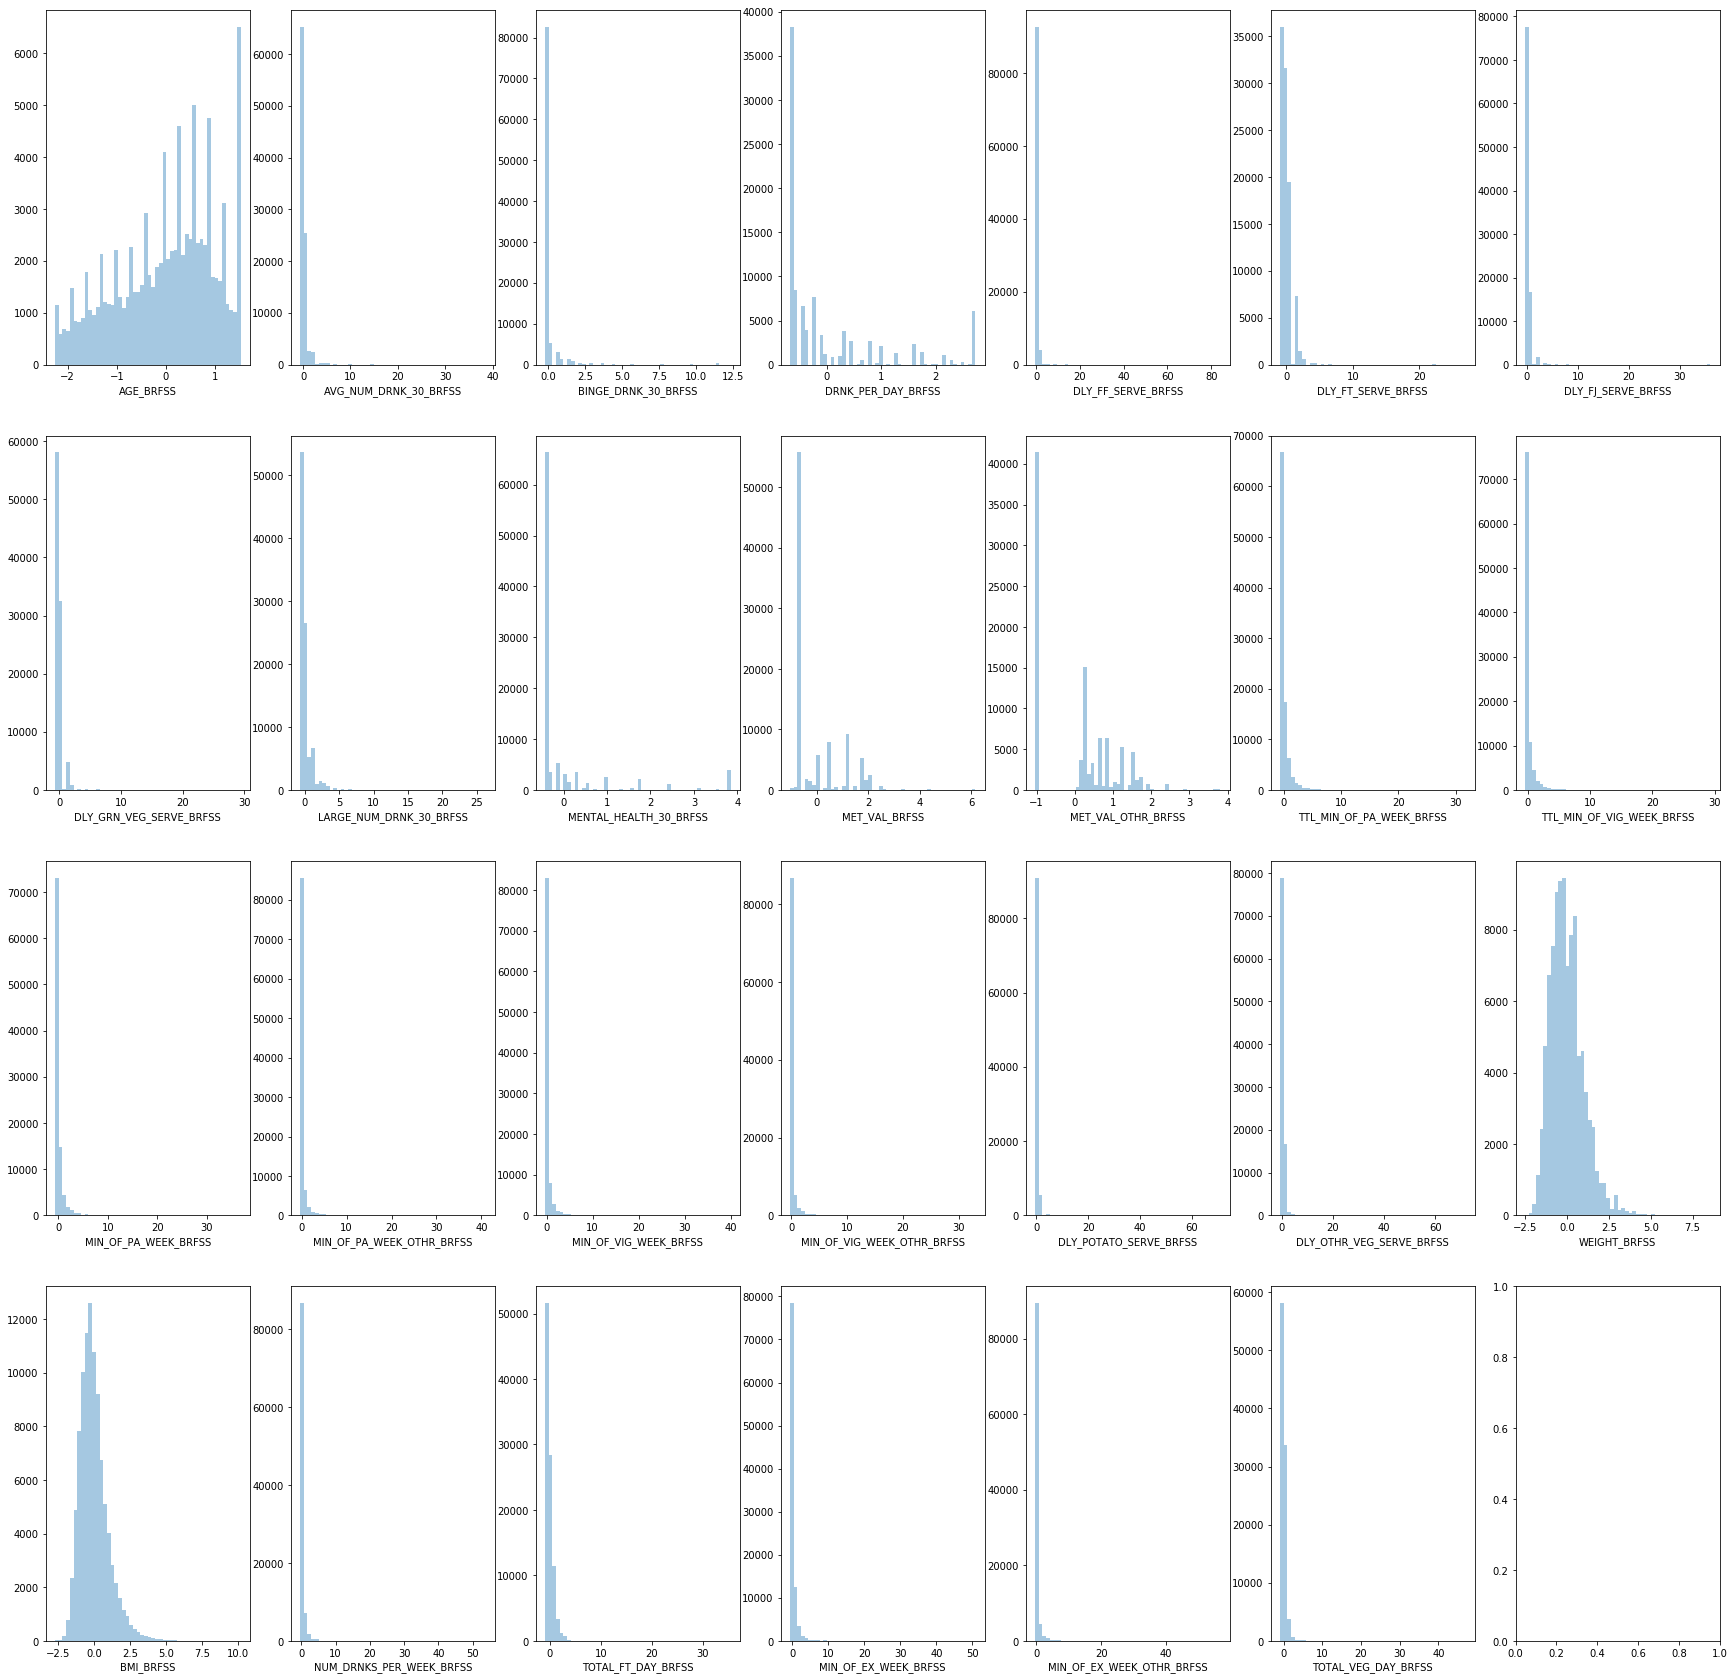

In [61]:
f, axs = plt.subplots(4, 7, figsize=(30, 30))
row = 0
col = 0
curr = 0
for i in high_value_continuous:
    temp = sns.distplot(
        brfss_norm[i], 
        kde=False,
        rug=False,
        norm_hist=False,
        ax=axs[row, col],
    )
    curr += 1
    col += 1
    if curr % 7 == 0:
        row += 1
    if curr % 7 == 0:
        col = 0

## Save data

In [62]:
brfss_norm.to_csv('../data/brfss_normed.csv.gz', index=False, compression='gzip')